In [1]:
pip install --upgrade "ibm-watson>=6.1.0"


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


### IBM Speech to Text KEY AND URL

In [1]:
ibm_key="H4rgMhnBksdasdwqqwqdwqwdqHxTDQ0UnxFAmsigQ06HM1eIj"
ibm_url="https://api.au-syd.speech-to-text.watson.cloud.ibm.com/instances/7e6bfcab-2ea6-4sdasdaswqw-1b21661d9b"

### Connection with IBM Watson

In [2]:
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
authenticator = IAMAuthenticator(ibm_key)
speech_to_text = SpeechToTextV1(
    authenticator = authenticator
)

speech_to_text.set_service_url(ibm_url)


### Passing the audio file to convert into text

In [4]:
%%time
with open('GalaxyS21Review.mp3', 'rb') as audio_file:
    speech_reco_results = speech_to_text.recognize(
        audio=audio_file,
        content_type='audio/mp3',
    ).get_result()
    
transcript_response = speech_reco_results['results'][0]['alternatives'][0]['transcript']
#transcript_response = speech_reco_results['transcript']

CPU times: total: 125 ms
Wall time: 1min 40s


### Get the result with confidence score

In [5]:
speech_reco_results

{'result_index': 0,
 'results': [{'final': True,
   'alternatives': [{'transcript': "Hey what's up ", 'confidence': 0.84}]},
  {'final': True,
   'alternatives': [{'transcript': 'so the Samsung galaxy S. twenty one is two hundred dollars cheaper than last year ',
     'confidence': 0.97}]},
  {'final': True,
   'alternatives': [{'transcript': "that's a big deal we're so used to the prices of phones going up and up and up year after year that when you do see a big jump down in price ",
     'confidence': 0.97}]},
  {'final': True,
   'alternatives': [{'transcript': "because there was a conscious decision made here to offer more value so basically every smartphone that's not the highest in thing they can make is fundamentally a balancing act to try to check just the right set of boxes and combine just the right set of features to appeal to the most buyers and that's especially if your Samsung because they've got this goal to be the default smartphone to keep their top spot top of mine bu

In [6]:
transcript_text = str(speech_reco_results)

### Text Processing on Transcript

In [7]:
import re
text2 = transcript_text.replace('result_index','')
text2 = text2.replace('confidence','')
text2 = text2.replace('final','')
text2 = text2.replace('True','')
text2 = text2.replace('[','')
text2 = text2.replace(']','')
text2 = text2.replace('{','')
text2 = text2.replace('}','')
text2 = text2.replace('alternatives','')
text2 = text2.replace('transcript','')
text2 = text2.replace(':','')
text2 = text2.replace('results','') 
text2 = re.sub(r"[^a-zA-Z0-9 ]", "", text2)
text2 = re.sub(r'[0-9]', "", text2)
#text2 = text2.replace('  ','')
str=text2.split()
new_string=" ".join(str)
print(new_string)

Hey whats up so the Samsung galaxy S twenty one is two hundred dollars cheaper than last year thats a big deal were so used to the prices of phones going up and up and up year after year that when you do see a big jump down in price because there was a conscious decision made here to offer more value so basically every smartphone thats not the highest in thing they can make is fundamentally a balancing act to try to check just the right set of boxes and combine just the right set of features to appeal to the most buyers and thats especially if your Samsung because theyve got this goal to be the default smartphone to keep their top spot top of mine but the customer is more educated than ever as a No pressure anything but you gotta check the right set of boxes or else what the galaxy S twenty one a drop this year I think checks all the most important boxes most people care about performance battery camera and a smart sacrifices theyve made to get to drop the price by two hundred Bucks al

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\prngr\appdata\local\programs\python\python310\lib\site-packages (1.8.2.2)




[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [9]:
import os
file1 = open("Transcript_Data_GalaxyS21.txt","w+")
file1.writelines(new_string)
file1.close()

In [10]:
new_string_lower = new_string.lower()

In [11]:
import re
new_string_punctuation = new_string_lower.replace('[^\w\s]','')

In [12]:
%%time
pip install nltk


CPU times: total: 15.6 ms
Wall time: 2.08 s



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [13]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from nltk.tokenize import word_tokenize 
tokens = word_tokenize(new_string_punctuation) 
new_string_without_stopword = [k for k in tokens if not k in stopwords] 

In [18]:
string_final =" ".join(new_string_without_stopword)
print(string_final)

hey whats samsung galaxy twenty one two hundred dollars cheaper last year thats big deal used prices phones going year year see big jump price conscious decision made offer value basically every smartphone thats highest thing make fundamentally balancing act try check right set boxes combine right set features appeal buyers thats especially samsung theyve got goal default smartphone keep top spot top mine customer educated ever pressure anything got ta check right set boxes else galaxy twenty one drop year think checks important boxes people care performance battery camera smart sacrifices theyve made get drop price two hundred bucks almost one notice first lets start big one design said think nice actually grown started like dont really hate went somewhere kinda like think one best honestly youre gon na camera bump phone looks good gray looks even better purple gold teddy fresh contrast combo looks even better icon skin link course generally like said twenty one orchard view purposefu

### WordCloud

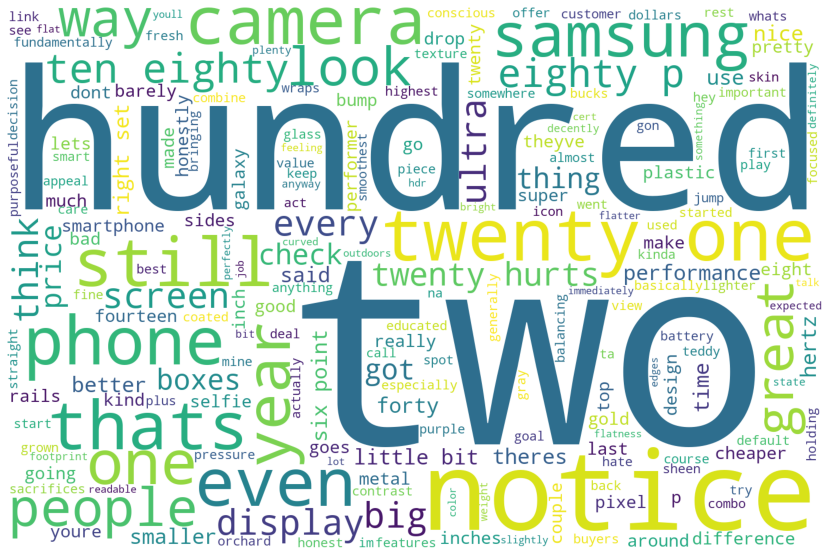

In [19]:
# importing the library
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1500, height=1000).generate(string_final)
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer = self._vectorizer
X = vectorizer.fit_transform(new_string_without_stopword)
vectorizer.get_feature_names_out()

array(['absolutely', 'act', 'actually', 'almost', 'also', 'anything',
       'anyway', 'appeal', 'area', 'around', 'back', 'bad', 'balancing',
       'barely', 'basically', 'battery', 'best', 'better', 'bezels',
       'big', 'bit', 'black', 'boxes', 'bright', 'bringing', 'bucks',
       'bummer', 'bump', 'buyers', 'call', 'camera', 'care', 'cert',
       'cheaper', 'check', 'checks', 'chip', 'coated', 'color',
       'colorway', 'combine', 'combo', 'conscious', 'contrast', 'could',
       'couldnt', 'couple', 'course', 'curved', 'customer', 'cut', 'deal',
       'decently', 'decision', 'default', 'definitely', 'density',
       'design', 'difference', 'differences', 'different', 'display',
       'dollars', 'dont', 'drop', 'dropped', 'edges', 'educated', 'eight',
       'eighty', 'else', 'end', 'especially', 'even', 'ever', 'every',
       'expected', 'features', 'feeling', 'fine', 'fingerprint', 'first',
       'flat', 'flatness', 'flatter', 'focused', 'footprint', 'forty',
       'f

In [28]:
import pandas as pd
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,absolutely,act,actually,almost,also,anything,anyway,appeal,area,around,...,whats,whether,wont,would,wraps,yeah,year,youll,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
filename = 'BagOfWords.csv'
df_bow_sklearn.to_csv(filename)

In [30]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

wordCount = word_count(string_final)
print(wordCount)

{'hey': 1, 'whats': 1, 'samsung': 5, 'galaxy': 2, 'twenty': 13, 'one': 12, 'two': 8, 'hundred': 8, 'dollars': 1, 'cheaper': 2, 'last': 2, 'year': 5, 'thats': 6, 'big': 4, 'deal': 1, 'used': 1, 'prices': 1, 'phones': 2, 'going': 2, 'see': 1, 'jump': 1, 'price': 2, 'conscious': 1, 'decision': 1, 'made': 2, 'offer': 1, 'value': 1, 'basically': 1, 'every': 4, 'smartphone': 2, 'highest': 1, 'thing': 1, 'make': 2, 'fundamentally': 1, 'balancing': 1, 'act': 1, 'try': 1, 'check': 2, 'right': 3, 'set': 3, 'boxes': 3, 'combine': 1, 'features': 1, 'appeal': 1, 'buyers': 1, 'especially': 1, 'theyve': 2, 'got': 3, 'goal': 1, 'default': 1, 'keep': 1, 'top': 2, 'spot': 1, 'mine': 1, 'customer': 1, 'educated': 1, 'ever': 1, 'pressure': 1, 'anything': 1, 'ta': 1, 'else': 1, 'drop': 2, 'think': 4, 'checks': 1, 'important': 1, 'people': 5, 'care': 1, 'performance': 3, 'battery': 1, 'camera': 6, 'smart': 1, 'sacrifices': 1, 'get': 2, 'bucks': 1, 'almost': 1, 'notice': 8, 'first': 1, 'lets': 2, 'start': 1,

### Highest count of Word count

In [31]:
wordCountNew = {item : value for(item,value) in wordCount.items() if value > 5 }
print(wordCountNew)

{'twenty': 13, 'one': 12, 'two': 8, 'hundred': 8, 'thats': 6, 'camera': 6, 'notice': 8, 'like': 11, 'even': 6, 'still': 6, 'p': 7, 'ten': 6}


In [32]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [33]:
pip install requests_html


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [34]:
from requests_html import HTMLSession
from rake_nltk import Rake


'''def extract_text():
    s = HTMLSession()
    url = 'https://www.musicradar.com/reviews/tech/akg-c214-172209'
    response = s.get(url)
    return response.html.find('div#article-body', first=True).text

#print(extract_text())'''

r = Rake()
r.extract_keywords_from_text(string_final)
for rating, keyword in r.get_ranked_phrases_with_scores():
    if rating > 5:
        print(rating, keyword)

249001.0 hey whats samsung galaxy twenty one two hundred dollars cheaper last year thats big deal used prices phones going year year see big jump price conscious decision made offer value basically every smartphone thats highest thing make fundamentally balancing act try check right set boxes combine right set features appeal buyers thats especially samsung theyve got goal default smartphone keep top spot top mine customer educated ever pressure anything got ta check right set boxes else galaxy twenty one drop year think checks important boxes people care performance battery camera smart sacrifices theyve made get drop price two hundred bucks almost one notice first lets start big one design said think nice actually grown started like dont really hate went somewhere kinda like think one best honestly youre gon na camera bump phone looks good gray looks even better purple gold teddy fresh contrast combo looks even better icon skin link course generally like said twenty one orchard view 

In [37]:
pip install python-rake==1.4.4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\prngr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


### Reka

In [38]:
# Reka
import RAKE
import operator

# Reka setup with stopword directory
stop_dir = "SmartStoplist.txt"
rake_object = RAKE.Rake(stop_dir)

# Sample text to test RAKE
text = string_final
#Extract keywords
for  keyword in rake_object.run(text):
        #words = str(keyword).split(',')
        #rating = words[1]
        #Review = words[0]
        #print(rating,Review)
        print(keyword)
        
#keywords = rake_object.run(text)
#print ("keywords: ", keywords)
#words = string.split(',')

('inch display state expected decently', 23.0)
('flatter edges slightly curved twenty', 22.875)
('bit gold rails kind peeking', 21.0)
('pretty sharp display ten eighty', 20.3)
('hey whats samsung galaxy twenty', 19.875)
('super fine smoothest texture', 16.0)
('focused smaller footprint weight', 16.0)
('set features appeal buyers', 15.0)
('reason people wont notice', 13.833333333333334)
('icon skin link', 9.0)
('flatness lot colorway', 9.0)
('bit cheaper ideally', 9.0)
('thin black bezels', 9.0)
('bad pixel density', 9.0)
('variable refresh rate', 9.0)
('performer hesitation trip', 9.0)
('ultra yeah people', 8.833333333333334)
('hundred dollars cheaper', 8.6)
('set boxes combine', 8.5)
('lets start big', 8.5)
('ultra honest im', 8.333333333333334)
('goal default smartphone', 8.0)
('time twenty hurts', 7.875)
('hundred twenty hertz', 7.808333333333334)
('screen ten eighty', 7.8)
('galaxy twenty', 6.375)
('samsung theyve', 5.5)
('set boxes', 5.5)
('ten eighty', 5.3)
('hundred bucks', 4.6)